In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [163]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
sample  = pd.read_csv('Sample_Submission_ZAuTl8O_FK3zQHh.csv')


In [164]:
train.dropna(inplace = True)


In [165]:

X = train.iloc[:,:-1]
y = train.iloc[:,-1]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [166]:
cols = X_train._get_numeric_data().columns
cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History


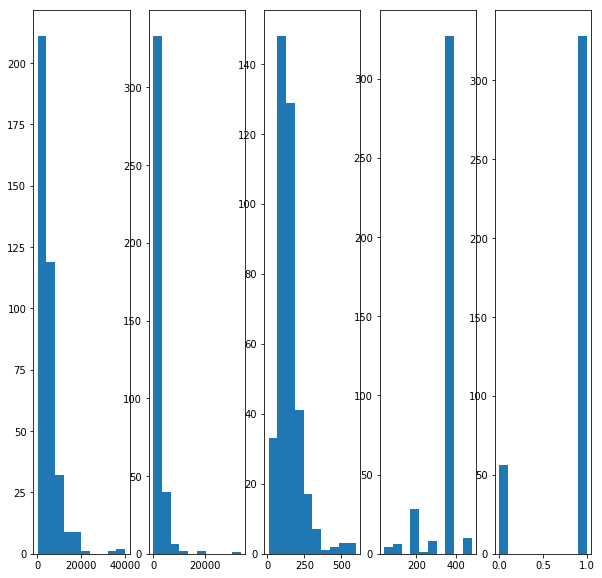

In [167]:
i = 151
plt.figure(figsize = (10,10))

for col in cols:
    print(col)
    plt.subplot(i)
    plt.hist(X_train[col])
    i = i + 1
    

In [168]:
# Knn
min_max = MinMaxScaler()
Knn = KNeighborsClassifier(n_neighbors = 5)
Knn.fit(min_max.fit_transform( X_train[cols]), y_train)
y_pred =  Knn.predict(min_max.fit_transform(X_test[cols]))
accuracy_score(y_pred, y_test)

0.7604166666666666

In [169]:
for col in cols:
    test[col].fillna(test[col].mode()[0], inplace = True)

In [170]:
prediction = Knn.predict(test[cols])

In [171]:
sample

,Loan_ID,Loan_Status


In [172]:
test_df = test.copy()

In [173]:
test_df['Loan_Status'] = prediction

In [174]:
pre = test_df[['Loan_ID','Loan_Status']]

In [175]:
pre.to_csv('prediction.csv', index=False)

In [177]:
pre[pre.Loan_Status == 'Y'].count()

Loan_ID        35
Loan_Status    35
dtype: int64